In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [3]:
x_train = torch.cat([x1_train, x2_train, x3_train], dim=1)
print(x_train)
print(x_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
torch.Size([5, 3])


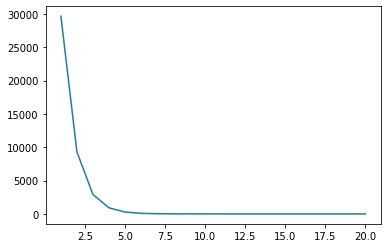

In [4]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)
loss = nn.MSELoss()

nb_epochs = 20
epochs = np.arange(1, nb_epochs+1)
y_cost = []

for epoch in epochs:
    optimizer.zero_grad()
    # Forward Prop
    hypothesis = torch.matmul(x_train, W) + b
    cost = loss(hypothesis, y_train)
    # Backward Prop
    cost.backward()
    optimizer.step()
    # for plotting
    y_cost.append(float(cost))

fig = plt.plot(epochs, y_cost)

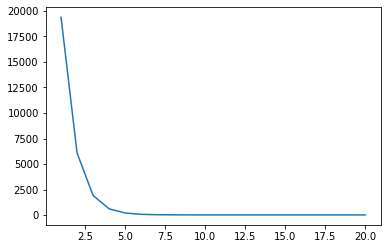

In [6]:
# optimizer 설정
nb_epochs = 20
epochs = np.arange(1, nb_epochs+1)
model = nn.Linear(3, 1) # (입력, 출력 사이즈)
optimizer = optim.SGD(model.parameters(), lr=1e-5) # 파라미터 자동 생성
loss = nn.MSELoss()

y_cost = []

for epoch in epochs:
    optimizer.zero_grad()
    # Forward Prop
    hypothesis = model(x_train)  # 식 대신 모델 사용
    cost = loss(hypothesis, y_train)
    # Backward Prop
    cost.backward()
    optimizer.step()
    # for plotting
    y_cost.append(float(cost))

fig = plt.plot(epochs, y_cost)